In [1]:
## First lets import data using opendatasets

In [2]:
#import opendatasets and provide kaggle link. Put in login details and then download the Kaggle dataset
import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/hemil26/crime-in-los-angeles?select=crime_in_la.csv'

In [4]:
od.download(dataset)

Skipping, found downloaded files in ".\crime-in-los-angeles" (use force=True to force download)


In [5]:
#import os and use .listdir to get the name of the csv file you want
import os

In [6]:
data_dir = '.\crime-in-los-angeles'
os.listdir(data_dir)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Isha Ahad\AppData\Local\Temp\ipykernel_9676\182136995.py:1: SyntaxWarning: invalid escape sequence '\c'
  data_dir = '.\crime-in-los-angeles'


['.ipynb_checkpoints',
 'MO_CODES_Numerical_20191119.pdf',
 'UCR-COMPSTAT062618.pdf',
 'UCR_Manual.pdf']

In [7]:
#import pandas to read the csv file
import pandas as pd

In [8]:
#give your dataframe a name and read the csv file using .readcsv
crime_data = pd.read_csv('crime_in_la.csv')

In [9]:
crime_data

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495405,221907283,20/03/2022,01:00,19,Mission,1901,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1822,37,M,W,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14000 BALBOA BL,34.3226,-118.4905
495406,221906145,23/02/2022,12:10,19,Mission,1985,421,THEFT FROM MOTOR VEHICLE - ATTEMPT,1822 1402,48,F,H,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,8400 VAN NUYS BL,34.2229,-118.4487
495407,221005507,09/02/2022,15:30,10,West Valley,1024,510,VEHICLE - STOLEN,0,0,X,X,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,18800 SHERMAN WY,34.2011,-118.5426
495408,221105477,08/02/2022,20:00,11,Northeast,1171,510,VEHICLE - STOLEN,0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,4000 FOUNTAIN AV,34.0958,-118.2787


## Now it's time to start cleaning the data

In [10]:
#first we will import all the necessary libaries (we already did pandas)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to make the plots appear directly below when the plot function is called 
%matplotlib inline 

In [11]:
#check how the data looks using .head function 
crime_data.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


In [12]:
#look at the shape of the data using .shape. Dataframe has 495410 rows and 20 columns
crime_data.shape

(495410, 20)

In [13]:
#now lets find all the duplicates in the dataframe using .duplicated we will use .sum to see how many there are 
crime_data.duplicated().sum() 

0

In [14]:
#lucky it returned with 0 duplicates less work for me. 
#But if it did have duplicates I'd use .drop_duplicates(inplace= true) to get rid of duplicates and make changes permanent

In [15]:
#lets get a summary of all the info of the dataframe, here we can see that a lot of the format types are object or intger
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495410 entries, 0 to 495409
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           495410 non-null  int64  
 1   DATE OCC        495410 non-null  object 
 2   TIME OCC        495410 non-null  object 
 3   AREA            495410 non-null  int64  
 4   AREA NAME       495410 non-null  object 
 5   Rpt Dist No     495410 non-null  int64  
 6   Crm Cd          495410 non-null  int64  
 7   Crm Cd Desc     495410 non-null  object 
 8   Mocodes         495410 non-null  object 
 9   Vict Age        495410 non-null  int64  
 10  Vict Sex        495410 non-null  object 
 11  Vict Descent    495410 non-null  object 
 12  Premis Desc     495197 non-null  object 
 13  Weapon Used Cd  495410 non-null  float64
 14  Weapon Desc     495410 non-null  object 
 15  Status          495410 non-null  object 
 16  Status Desc     495410 non-null  object 
 17  LOCATION  

In [16]:
crime_data

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495405,221907283,20/03/2022,01:00,19,Mission,1901,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1822,37,M,W,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14000 BALBOA BL,34.3226,-118.4905
495406,221906145,23/02/2022,12:10,19,Mission,1985,421,THEFT FROM MOTOR VEHICLE - ATTEMPT,1822 1402,48,F,H,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,8400 VAN NUYS BL,34.2229,-118.4487
495407,221005507,09/02/2022,15:30,10,West Valley,1024,510,VEHICLE - STOLEN,0,0,X,X,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,18800 SHERMAN WY,34.2011,-118.5426
495408,221105477,08/02/2022,20:00,11,Northeast,1171,510,VEHICLE - STOLEN,0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,4000 FOUNTAIN AV,34.0958,-118.2787


In [17]:
#these headings are not very python friendly lets change them
new_columns = {'DATE OCC':'DATE_OCC','TIME OCC':'TIME_OCC'}
crime_data= crime_data.rename(columns= new_columns)

In [18]:
#now lets create a new column where we combine the date and the time columns and then covert them to datetime format 
crime_data['DATE_AND_TIME_OCC'] = crime_data['DATE_OCC'] + ['-'] + crime_data['TIME_OCC']

In [19]:
crime_data

,DR_NO,DATE_OCC,TIME_OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON,DATE_AND_TIME_OCC
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,...,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978,08/01/2020-22:30
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,...,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545,01/01/2020-03:30
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,...,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,01/01/2020-17:30
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,...,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468,01/01/2020-04:15
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,...,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534,01/01/2020-00:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495405,221907283,20/03/2022,01:00,19,Mission,1901,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1822,37,...,W,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14000 BALBOA BL,34.3226,-118.4905,20/03/2022-01:00
495406,221906145,23/02/2022,12:10,19,Mission,1985,421,THEFT FROM MOTOR VEHICLE - ATTEMPT,1822 1402,48,...,H,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,8400 VAN NUYS BL,34.2229,-118.4487,23/02/2022-12:10
495407,221005507,09/02/2022,15:30,10,West Valley,1024,510,VEHICLE - STOLEN,0,0,...,X,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,18800 SHERMAN WY,34.2011,-118.5426,09/02/2022-15:30
495408,221105477,08/02/2022,20:00,11,Northeast,1171,510,VEHICLE - STOLEN,0,0,...,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,4000 FOUNTAIN AV,34.0958,-118.2787,08/02/2022-20:00


In [20]:
#coverting new column into datetime format using pd.to_datetime got a format error so changed it to fit the  format
crime_data.DATE_AND_TIME_OCC =pd.to_datetime(crime_data.DATE_AND_TIME_OCC, format= '%d/%m/%Y-%H:%M')

In [21]:
crime_data

,DR_NO,DATE_OCC,TIME_OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON,DATE_AND_TIME_OCC
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,...,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978,2020-01-08 22:30:00
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,...,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545,2020-01-01 03:30:00
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,...,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,2020-01-01 17:30:00
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,...,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468,2020-01-01 04:15:00
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,...,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534,2020-01-01 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495405,221907283,20/03/2022,01:00,19,Mission,1901,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1822,37,...,W,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14000 BALBOA BL,34.3226,-118.4905,2022-03-20 01:00:00
495406,221906145,23/02/2022,12:10,19,Mission,1985,421,THEFT FROM MOTOR VEHICLE - ATTEMPT,1822 1402,48,...,H,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,8400 VAN NUYS BL,34.2229,-118.4487,2022-02-23 12:10:00
495407,221005507,09/02/2022,15:30,10,West Valley,1024,510,VEHICLE - STOLEN,0,0,...,X,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,18800 SHERMAN WY,34.2011,-118.5426,2022-02-09 15:30:00
495408,221105477,08/02/2022,20:00,11,Northeast,1171,510,VEHICLE - STOLEN,0,0,...,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,4000 FOUNTAIN AV,34.0958,-118.2787,2022-02-08 20:00:00


In [22]:
#checking if it has actually changed to datetime format using .info
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495410 entries, 0 to 495409
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DR_NO              495410 non-null  int64         
 1   DATE_OCC           495410 non-null  object        
 2   TIME_OCC           495410 non-null  object        
 3   AREA               495410 non-null  int64         
 4   AREA NAME          495410 non-null  object        
 5   Rpt Dist No        495410 non-null  int64         
 6   Crm Cd             495410 non-null  int64         
 7   Crm Cd Desc        495410 non-null  object        
 8   Mocodes            495410 non-null  object        
 9   Vict Age           495410 non-null  int64         
 10  Vict Sex           495410 non-null  object        
 11  Vict Descent       495410 non-null  object        
 12  Premis Desc        495197 non-null  object        
 13  Weapon Used Cd     495410 non-null  float64 

In [23]:
#now that we've converted it to datetime we can easily extract information from this column like dt.month dt.week dt.hour ect 
crime_data.DATE_AND_TIME_OCC.dt.month


0         1
1         1
2         1
3         1
4         1
         ..
495405    3
495406    2
495407    2
495408    2
495409    2
Name: DATE_AND_TIME_OCC, Length: 495410, dtype: int32

In [24]:
#now lets get info on the numerical columns using .describe 
crime_data.describe()

,DR_NO,AREA,Rpt Dist No,Crm Cd,Vict Age,Weapon Used Cd,LAT,LON,DATE_AND_TIME_OCC
count,4.954100e+05,495410.000000,495410.000000,495410.000000,495410.000000,495410.000000,495410.000000,495410.000000,495410
mean,2.091465e+08,10.768563,1123.137430,504.674966,29.950849,450.564625,33.917114,-117.811277,2021-03-25 01:32:16.113198848
min,8.170000e+02,1.000000,101.000000,110.000000,-1.000000,101.000000,0.000000,-118.667600,2020-01-01 00:01:00
25%,2.014097e+08,6.000000,628.000000,330.000000,11.000000,400.000000,34.011200,-118.430100,2020-08-11 10:22:30
50%,2.106118e+08,11.000000,1145.000000,480.000000,31.000000,500.000000,34.058300,-118.322400,2021-04-03 14:55:00
75%,2.118202e+08,16.000000,1621.000000,626.000000,45.000000,500.000000,34.163475,-118.274000,2021-11-03 02:48:45
max,2.299104e+08,21.000000,2199.000000,956.000000,120.000000,516.000000,34.334300,0.000000,2022-05-30 22:10:00
std,7.395200e+06,6.068705,606.946832,209.159062,21.713890,99.543036,2.305902,8.000844,NaN


In [25]:
crime_data.describe (include = 'object') #non-numerical columns summary

,DATE_OCC,TIME_OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION
count,495410,495410,495410,495410,495410,495410,495410,495197,495410,495410,495410,495410
unique,881,1439,21,136,178790,4,19,306,78,5,5,56610
top,01/01/2020,12:00,77th Street,VEHICLE - STOLEN,0,M,H,STREET,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,800 N ALAMEDA ST
freq,995,17944,31537,54601,68967,208163,151736,126699,336947,395890,395890,955


In [37]:
#checking for columns with null missing values.. here we can see premises described have some missing values 
crime_data.columns[np.sum(crime_data.isnull())!=0] #!= means not 0

C:\Users\Isha Ahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['Premis Desc'], dtype='object')

In [27]:
#now lets check for columns with no missing values 
crime_data.columns[np.sum(crime_data.isnull())==0] 

Index(['DR_NO', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Weapon Used Cd', 'Weapon Desc', 'Status',
       'Status Desc', 'LOCATION', 'LAT', 'LON', 'DATE_AND_TIME_OCC'],
      dtype='object')

In [28]:
#creating a for loop to see the number of unique values 
for col in crime_data.columns:
    unique_count = crime_data[col].nunique()
    print (col+ ' has ' + str(unique_count) + ' unique values')

DR_NO has 495410 unique values
DATE_OCC has 881 unique values
TIME_OCC has 1439 unique values
AREA has 21 unique values
AREA NAME has 21 unique values
Rpt Dist No has 1186 unique values
Crm Cd has 136 unique values
Crm Cd Desc has 136 unique values
Mocodes has 178790 unique values
Vict Age has 101 unique values
Vict Sex has 4 unique values
Vict Descent has 19 unique values
Premis Desc has 306 unique values
Weapon Used Cd has 78 unique values
Weapon Desc has 78 unique values
Status has 5 unique values
Status Desc has 5 unique values
LOCATION has 56610 unique values
LAT has 5307 unique values
LON has 4934 unique values
DATE_AND_TIME_OCC has 175317 unique values


## Let's explore the data

In [29]:
#what are the most common crimes described?
crime_data ['Crm Cd Desc'].value_counts()

Crm Cd Desc
VEHICLE - STOLEN                                           54601
BATTERY - SIMPLE ASSAULT                                   39612
BURGLARY FROM VEHICLE                                      32071
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    31969
BURGLARY                                                   30507
                                                           ...  
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)                   3
TELEPHONE PROPERTY - DAMAGE                                    2
FAILURE TO DISPERSE                                            2
GRAND THEFT / AUTO REPAIR                                      1
BLOCKING DOOR INDUCTION CENTER                                 1
Name: count, Length: 136, dtype: int64

In [30]:
#what is the most common crime described? can you display it nicely? - the answer is vehicle stolen make a print statement
most_common_crime= crime_data ['Crm Cd Desc'].value_counts().idxmax()
print("The most common crime is: " , most_common_crime)

The most common crime is:  VEHICLE - STOLEN


Crm Cd Desc
VEHICLE - STOLEN                                           0.110214
BATTERY - SIMPLE ASSAULT                                   0.079958
BURGLARY FROM VEHICLE                                      0.064736
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    0.064530
BURGLARY                                                   0.061579
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             0.059171
THEFT PLAIN - PETTY ($950 & UNDER)                         0.052974
INTIMATE PARTNER - SIMPLE ASSAULT                          0.052054
THEFT OF IDENTITY                                          0.051059
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            0.042684
Name: count, dtype: float64

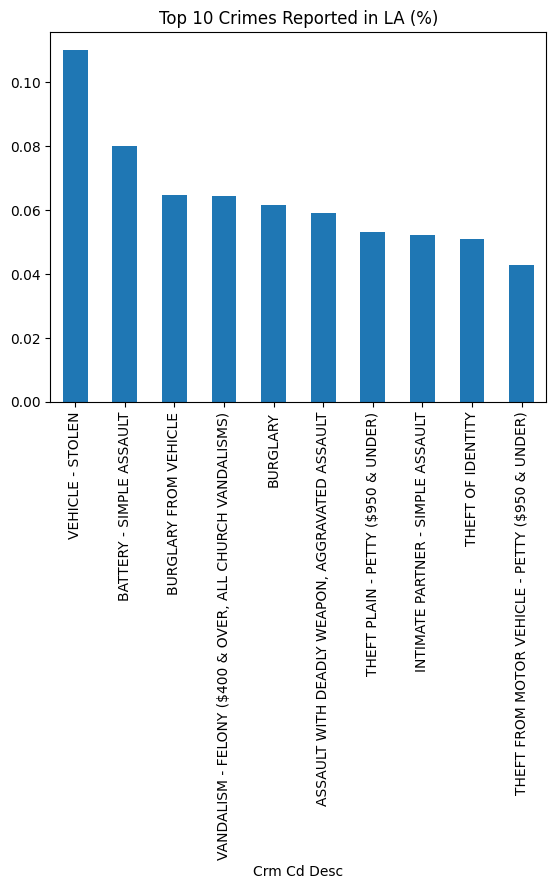

In [31]:
#now lets make a bar chart of the top 10 crimes reported. I will use the display function to make a list of stats and then use
#.plot(kind='bar') to make a barchart
most_common_crime= crime_data ['Crm Cd Desc'].value_counts()[:10] #top 10 crimes reported
display (most_common_crime / crime_data.shape[0]) #.shape[0] is the number of rows only

#plotting the bar chart
(most_common_crime/ crime_data.shape[0]).plot(kind='bar');
plt.title('Top 10 Crimes Reported in LA (%)');




Crm Cd Desc
BLOCKING DOOR INDUCTION CENTER                              0.000002
GRAND THEFT / AUTO REPAIR                                   0.000002
TELEPHONE PROPERTY - DAMAGE                                 0.000004
FAILURE TO DISPERSE                                         0.000004
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)          0.000006
PICKPOCKET, ATTEMPT                                         0.000006
FIREARMS RESTRAINING ORDER (FIREARMS RO)                    0.000006
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)                0.000006
BIGAMY                                                      0.000008
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM    0.000008
Name: count, dtype: float64

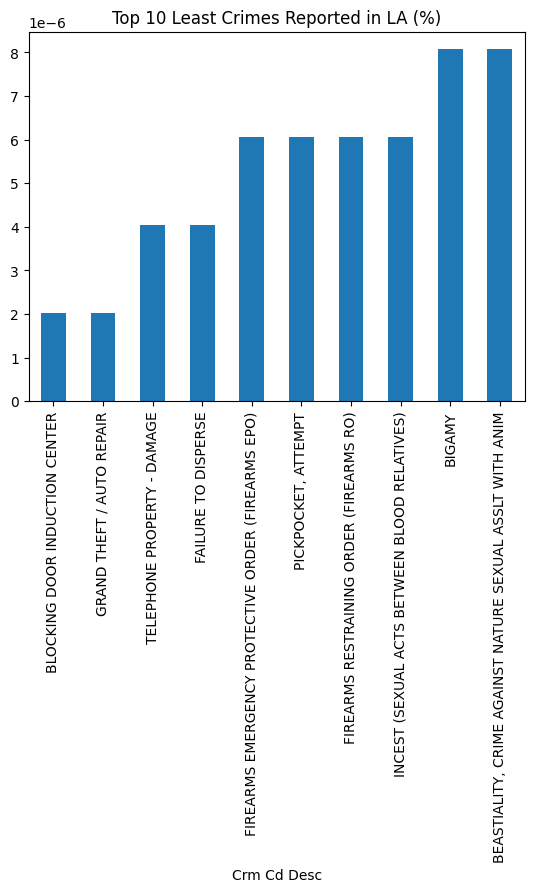

In [32]:
#now do the same but for the 10 least common crimes reported 
least_common_crime= crime_data ['Crm Cd Desc'].value_counts().sort_values(ascending= True)[:10]
display (least_common_crime / crime_data.shape[0]) #.shape[0] is the number of rows only

#plotting the bar chart
(least_common_crime/ crime_data.shape[0]).plot(kind='bar');
plt.title('Top 10 Least Crimes Reported in LA (%)');


Text(0.5, 1.0, 'Frequency of crimes in LA per year')

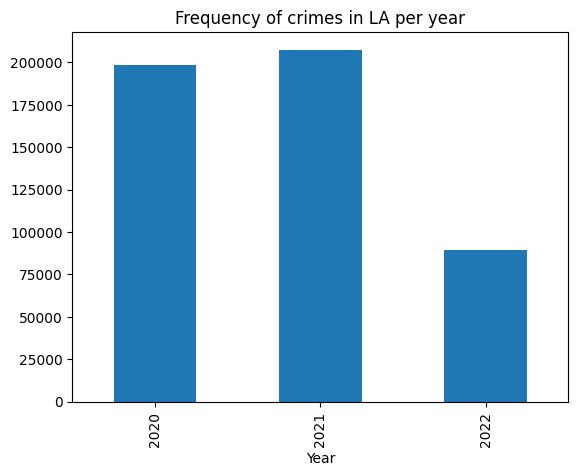

In [33]:
#In which year were the most crimes committed in LA? - according to this its 2021

#first lets extract the year from our datetime column 
crime_data ['Year'] = (crime_data['DATE_AND_TIME_OCC']).dt.year
#then lets groupby year and use count to put it against the dr_no
crime_data.groupby('Year').count()['DR_NO'].plot(kind='bar')
plt.title ('Frequency of crimes in LA per year')


Text(0.5, 1.0, 'Frequency of crimes in LA per Hour')

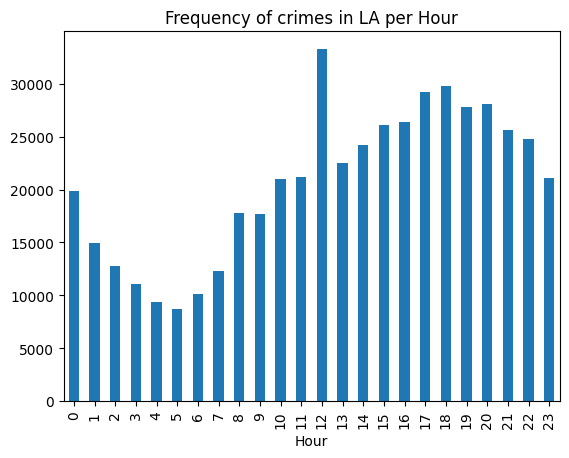

In [34]:
#Are there more crimes on specific hours?
#first lets extract the hours from our datetime column 
crime_data ['Hour'] = (crime_data['DATE_AND_TIME_OCC']).dt.hour
#then lets groupby year and use count to put it against the dr_no
crime_data.groupby('Hour').count()['DR_NO'].plot(kind='bar')
plt.title ('Frequency of crimes in LA per Hour')

Text(0.5, 1.0, 'Frequency of crimes in LA per Month')

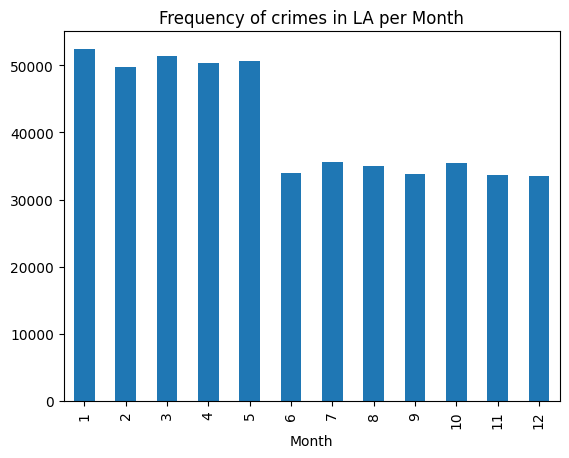

In [35]:
#Are there more crimes in specific months? According to this it says that January had the most crimes reported 
#first lets extract the hours from our datetime column 
crime_data ['Month'] = (crime_data['DATE_AND_TIME_OCC']).dt.month
#then lets groupby year and use count to put it against the dr_no
crime_data.groupby('Month').count()['DR_NO'].plot(kind='bar')
plt.title ('Frequency of crimes in LA per Month')

In [36]:
#ran into IOPUB data rate exceeded error so I will not be doing any further exploration on this project until I get a decent device.